# Create a Jupyter Notebook, which takes a random picture from each of those URLs mentioned below and provide their matching probabilities on each of the brands: 
## “https://source.unsplash.com/random/?car ,bmw” 
## “https://source.unsplash.com/random/?car ,mercedes” 
## “https://source.unsplash.com/random/?car ,audi” 
## Example: (random image source from one of the three URLs) -> [BMW: 11%, Audi: 27%, Mercedes: 67%]

In [1]:
import numpy as np
import pandas as pd

import os
import shutil

import cv2 
import matplotlib.pyplot as plt
%matplotlib inline 

from keras import layers
from keras import models
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
from keras.models import load_model

model = load_model("Final Image Classification model/final_model.h5")

In [3]:
import urllib
from skimage import io

In [4]:
def random_car_predict_probability():
    source_list = ["https://source.unsplash.com/random/?car", "https://source.unsplash.com/random/?car", "https://source.unsplash.com/random/?car"]
    for source in source_list:
        urllib.request.urlretrieve(source, "test_pic_random.jpg")
        
        image = io.imread(source)
        plt.imshow(image)
        plt.show()
        
        img_pred = cv2.imread('test_pic_random.jpg')


        img_pred = cv2.resize(img_pred,(32,32))
        img_pred = np.reshape(img_pred,[1,32,32,3])

        categories = ["BMW", "Mercedes", "Audi"]

        classes = model.predict_proba(img_pred)

        print()
        print('------------------------------------')
        probabilities = classes.tolist()
        probabilities = [item for probabilities in probabilities for item in probabilities]

        for one, two in zip(categories, probabilities):
            two_percent = "{:.2%}".format(two)
            print("{0}: {1}".format(one, two_percent))

        print('------------------------------------')

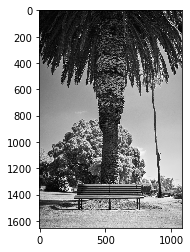

C:\Users\I523437\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '



------------------------------------
BMW: 0.00%
Mercedes: 0.00%
Audi: 100.00%
------------------------------------


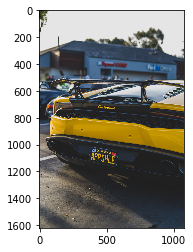


------------------------------------
BMW: 100.00%
Mercedes: 100.00%
Audi: 0.00%
------------------------------------


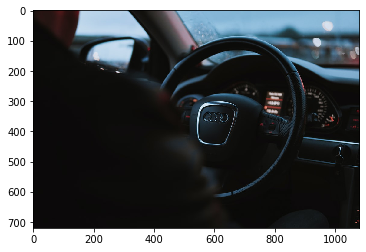


------------------------------------
BMW: 0.00%
Mercedes: 1.33%
Audi: 100.00%
------------------------------------


In [5]:
random_car_predict_probability()